<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

# Imports

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import boston_housing

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load Data

In [18]:
#Load
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data(
                                                                               path='boston_housing.npz',
                                                                               test_split=0.25,
                                                                               seed=113
                                                                              )

print(f"Number of input dimmensions: {X_train.shape[1]}")

Number of input dimmensions: 13


In [5]:
df = pd.read_csv("amesHousePrice.csv")
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
pd.set_option("display.max_rows", 100)
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [44]:
drops = ["Alley", "PoolQC", "Fence", "MiscFeature"]
df2 = df.drop(columns=drops)
print("df2 shape", df2.shape)
df3 = pd.get_dummies(df2)
print("df3 shape", df3.shape)
df3 = df3.dropna()
df3.isnull().sum()

df2 shape (1460, 77)
df3 shape (1460, 277)


Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
S

In [88]:
df3['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
8       129900
9       118000
10      129500
11      345000
13      279500
15      132000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
40      160000
41      170000
44      141000
45      319900
46      239686
47      249700
49      127000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
         ...  
1397    137500
1398    138000
1399    137450
1400    120000
1401    193000
1402    193879
1403    282922
1404    105000
1405    275000
1406    133000
1408    125500
1409    215000
1410    230000
1411    140000
1412     90000
1413    25

In [144]:
training, testing = train_test_split(df3, test_size=.2)

target = 'SalePrice'

X_train = training.drop(columns=target)
y_train = training[target]

X_test = testing.drop(columns=target)
y_test = testing[target]

norm = MinMaxScaler()

X_train = norm.fit_transform(X_train)
X_test = norm.fit_transform(X_test)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Feature Engineering

In [145]:
y_train.describe()

count       896.000000
mean     185459.010045
std       83400.683410
min       35311.000000
25%      130000.000000
50%      165075.000000
75%      218000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Model and Results

In [160]:
#Model
model = Sequential()

#Input
model.add(Dense(16, input_dim=276, activation='relu'))

#Hidden
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))

#Output
model.add(Dense(1, activation='linear'))

#Compile
model.compile(loss='mean_squared_error',
              metrics=['mean_squared_error'],
              optimizer='adam')

#Fit & Evaluate
history = model.fit(X_train, y_train, epochs=100, verbose=False, validation_split=.1)
scores = model.evaluate(X_test, y_test, verbose=0)

In [161]:
print(f"The MSE of our neural net is ${scores[1]}")
print(f"The RMSE of our neural net is ${round(np.sqrt(scores[1]), 2)}")

The MSE of our neural net is $1929977856.0
The RMSE of our neural net is $43931.51171875


In [178]:
dir(history.history)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [162]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

# Linear Regression Comparrison

In [102]:
#Fit
reg = LinearRegression().fit(X_train, y_train)

#Predict
y_pred = reg.predict(X_test)
reg_mse = mean_squared_error(y_test, y_pred)

#Result
print(f"The MSE of a Linear Regression model is ${round(reg_mse, 2)}")
print(f"The RMSE of our neural net is ${round(np.sqrt(reg_mse), 2)}")

The MSE of a Linear Regression model is $1000051337.35
The RMSE of our neural net is $31623.59


#### The Linear Regression has a better mean squared error than the linear regression model.

In [151]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error'])

# Data Viz

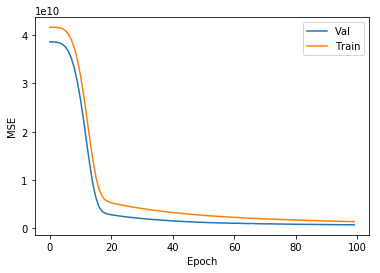

In [175]:
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_squared_error'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Val', 'Train'])
plt.show()

In [170]:
df3['SalePrice'].describe()

count      1121.000000
mean     185506.152542
std       82999.159004
min       35311.000000
25%      131000.000000
50%      164900.000000
75%      219500.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

# Load Data

In [105]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [128]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [110]:
# Hyper Parameters
batch_size = 64
num_classes = 10
epochs = 20

# Reshape the data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# X Variable Types
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [124]:
#Model
mnist_model = Sequential()

#Input
mnist_model.add(Dense(16, input_dim=784, activation='relu'))

#Hidden
mnist_model.add(Dense(16, kernel_initializer='normal', activation='relu'))
mnist_model.add(Dense(16, kernel_initializer='normal', activation='relu'))

#Output
mnist_model.add(Dense(10, activation='softmax'))

#Compile
mnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

#Fit & Evaluate
history = mnist_model.fit(X_train, y_train, epochs=100, verbose=False)

In [125]:
scores = mnist_model.evaluate(X_test, y_test, verbose=0)

In [129]:
print(f"The loss of our neural net is {scores[0]}")
print(f"The accuracy of our neural net is {scores[1]}")

The loss of our neural net is 0.43596937303543093
The accuracy of our neural net is 0.8586999773979187


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.